In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]

# Individual FF plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

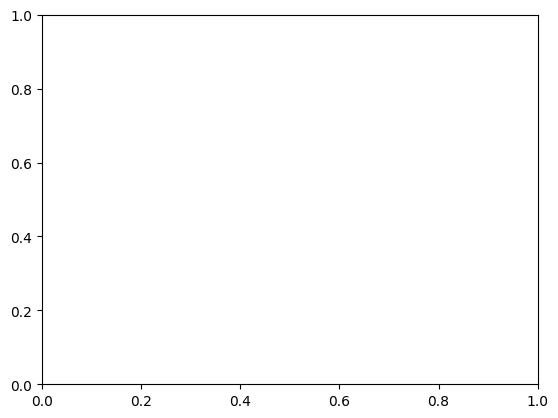

In [6]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)

for experiment in exp_list:
    if not experiment.startswith('.'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])        
        plt.plot(data['Bath_Temp_°C'], data['FF'], color=colors[1])
        
        plt.xlabel('Bath temp [°C]')
        plt.ylabel('FF')
        
        plt.legend()
        plt.grid()
        plt.xlim((-30, 0))
        plt.title(f'{experiment}')
        
        plt.savefig(paths.reports_path / 'individual-FF' / f'{experiment}.png')
        plt.cla()

# Non-heated vs heated

221007_LVS10_0811_0600_720min_T95_001
221006_LVS_0808_bg2_T95_001
221013_LVS51_0903_1900_660min_T95_001
221010_LVS27_0822_1800_720min_T95_001
221006_LVS02_0807_0600_493min_T95_001
221013_LVS49_0902_1800_720min_T95_001
221010_LVS24_0821_0600_720min_T95_001
221011_LVS31_0824_1800_720min_T95_001
221010_LVS_0819_bg4_T95_001
221011_LVS32_0825_0600_720min_T95_001
221011_LVS28_0823_0600_720min_T95_001
221007_LVS13_0812_1800_720min_T95_001
221010_LVS18_0818_0600_720min_T95_001
221010_LVS19_0818_1800_720min_T95_001
221007_LVS14_0813_0600_720min_T95_001
221012_LVS40_0829_0600_720min_T95_001
221007_LVS11_0811_1800_720min_T95_001
221006_LVS03_0807_1821_401min_T95_001
221013_LVS45_0831_1800_720min_T95_001
Can't find experiment 221013_LVS45_0831_1800_720min_T95_001
221011_LVS29_0823_1800_720min_T95_001
221006_LVS04_0808_0621_624min_T95_001
221013_LVS46_0901_0640_660min_T95_001
221006_LVS05_0808_1800_720min_T95_001
221006_LVS01_0806_1800_588min_T95_001
221007_LVS08_0810_0600_720min_T95_001
221010_LVS

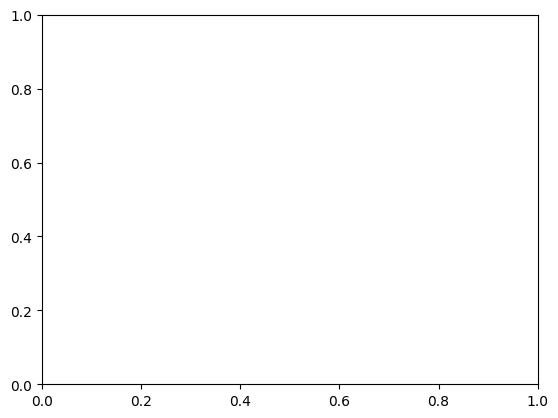

In [18]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)


for experiment in exp_list:
    if not experiment.startswith('.') and experiment.split('_')[-2] == 'T95':
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])
        
        plt.plot(data['Bath_Temp_°C'], data['FF'], color=colors[4], label='heated')
        
        a, b, c = experiment.split('_')[1:4]
        print(experiment)

        try:
            experiment = [s for s in exp_list if f"{a}_{b}_{c}" in s and "T20" in s][0]
        except IndexError:
            print(f"Can't find experiment {experiment}")
        
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])
        
        plt.plot(data['Bath_Temp_°C'], data['FF'], color=colors[1], label='non-heated')
        
        plt.xlabel('Bath temp [°C]')
        plt.ylabel('FF')
        
        plt.legend()
        plt.grid()
        plt.xlim((-30, 0))
        
        plt.savefig(paths.reports_path / 'heated-FF' / f'{experiment}.png')
        plt.cla()

# Agorithms comparison

In [19]:
def read_matlab_results(experiment):
    temp = np.genfromtxt(paths.raw_data_path / experiment / 'T_auto.csv',
             delimiter=',',
             dtype=[('temp', '<f8')])
    n_wells = np.genfromtxt(paths.raw_data_path / experiment / 'nFrz.csv',
              delimiter=',',
              dtype=[('n_wells', '<f8')])

    return temp['temp'], n_wells['n_wells']

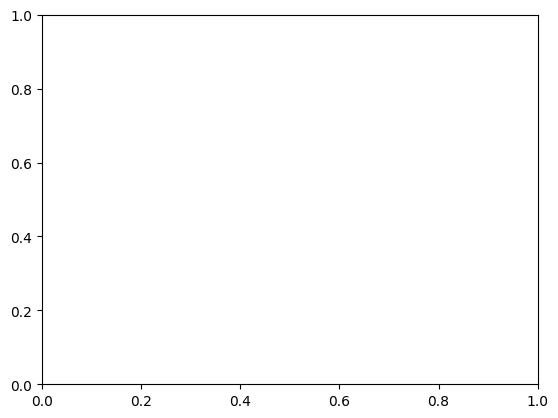

In [10]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)


for experiment in exp_list:
    if not experiment.startswith('.'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                     delimiter=',',
                     skip_header=1,
                     dtype=[('date', 'datetime64[s]'),
                            ('Setpoit_Temp_°C', '<f8'),
                            ('Bath_Temp_°C', '<f8'),
                            ('FF', '<f8')])
        
        plt.plot(data['Bath_Temp_°C'], data['FF'], label='Python')
        
        
        temp, n_wells = read_matlab_results(experiment)
        plt.plot(temp, n_wells/96., 'g', label='Matlab')
        
        plt.xlabel('Bath temp [°C]')
        plt.ylabel('FF')
        
        plt.legend()
        plt.grid()
        plt.xlim((-30, 0))
        
        plt.savefig(paths.reports_path / 'algorithms-comparison-FF' / f'{experiment}.png')
        plt.cla()

# Comparison heated vs non-heated

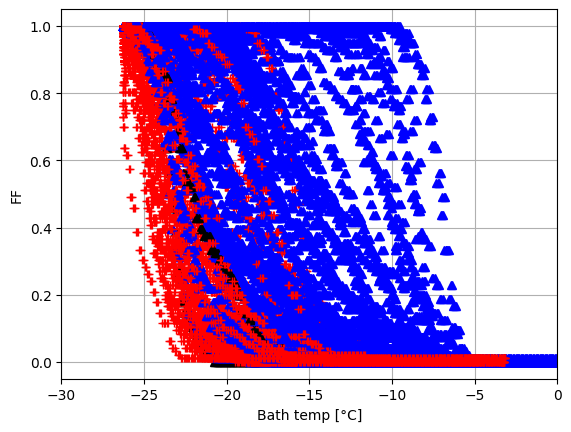

In [14]:
from src import paths

import os
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)

exp_list = os.listdir(paths.processed_data_path)


for experiment in exp_list:
    if not experiment.startswith('.'):
        data = np.genfromtxt(paths.processed_data_path / experiment / 'frozen_fraction_report.csv',
                         delimiter=',',
                         skip_header=1,
                         dtype=[('date', 'datetime64[s]'),
                                ('Setpoit_Temp_°C', '<f8'),
                                ('Bath_Temp_°C', '<f8'),
                                ('FF', '<f8')])
        
        if experiment.split('_')[-2] == 'T95':
            plt.plot(data['Bath_Temp_°C'], data['FF'], '+r', label='heated')
        
        elif experiment.split('_')[-2] == 'T20':
            plt.plot(data['Bath_Temp_°C'], data['FF'], '^b', label='non-heated')

        else:
            plt.plot(data['Bath_Temp_°C'], data['FF'], '^k', label='background')
        

# plt.legend()
plt.xlabel('Bath temp [°C]')
plt.ylabel('FF')

# plt.legend()
plt.xlim((-30, 0))
plt.grid()

plt.savefig(paths.reports_path / f'Comparison_heat_vs_nonheat.png')